# RETAIL DATASET

### Name: Moustafa Ayman Moustafa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
# Check the number of rows and columns.
df.shape

(9994, 13)

In [4]:
# Identify the data types of each column.
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
# Check first 5 rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
# Check missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

17

In [8]:
# Remove duplicates
df = df.drop_duplicates()

In [9]:
# Basic statistics
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


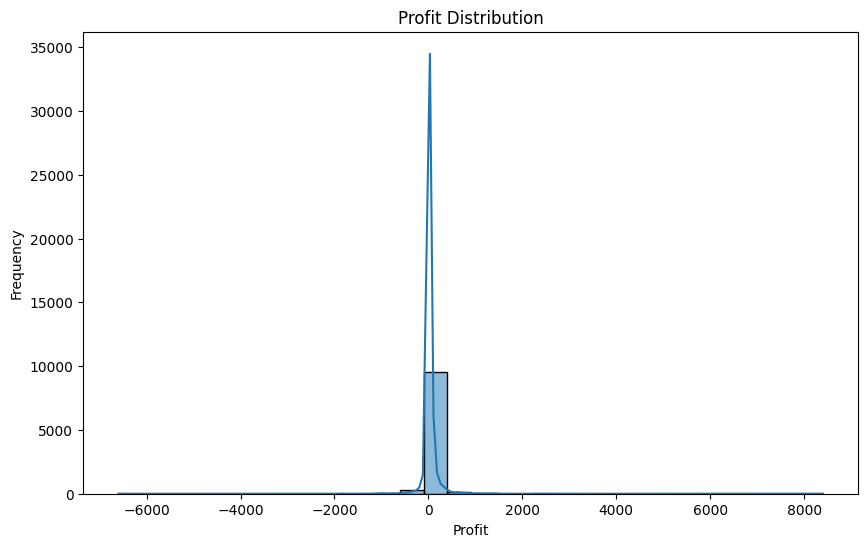

In [10]:
# Analyze profit distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

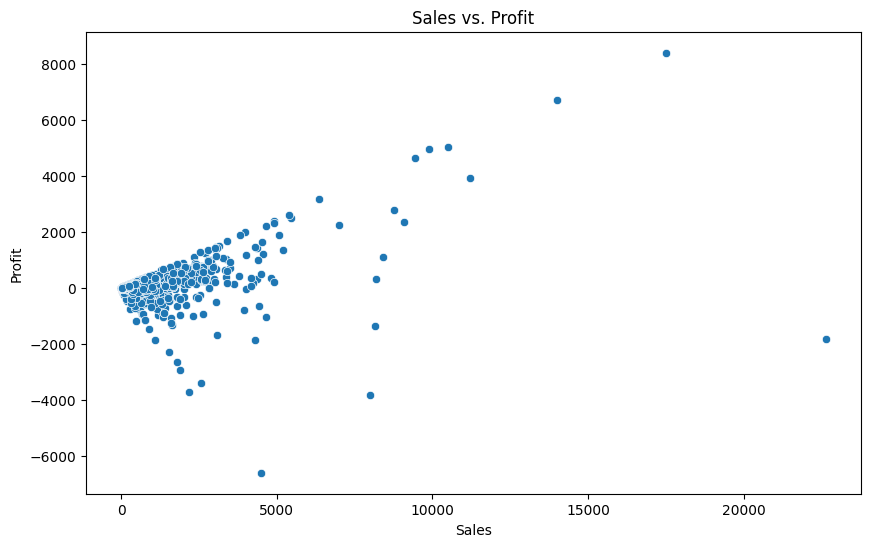

In [11]:
# Visualize the relationship between sales and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

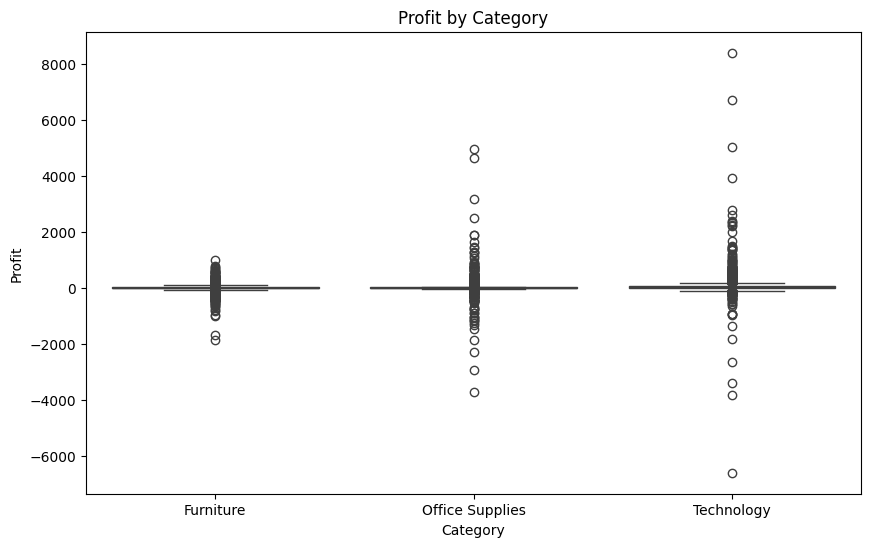

In [12]:
# Analyze profit by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

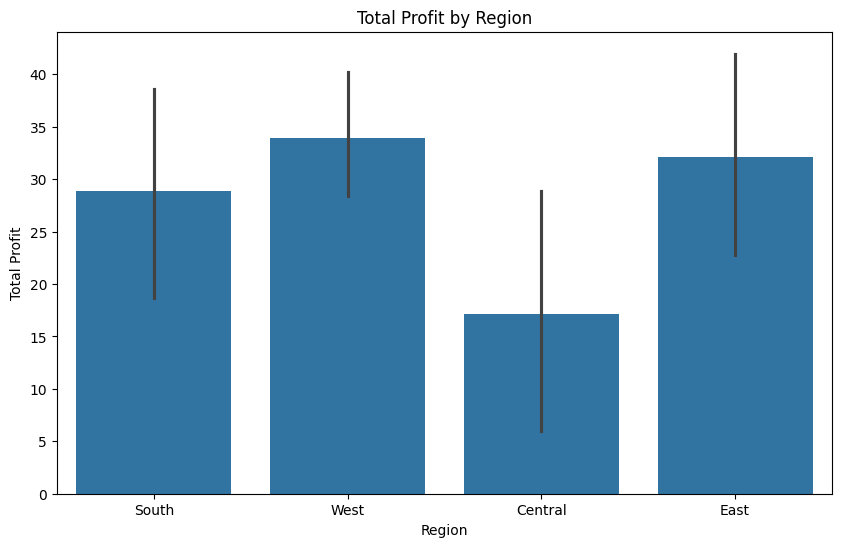

In [13]:
# Analyze profit by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=df)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

In [14]:
# Identify segments with negative profit
negative_profit = df[df['Profit'] < 0]
print(negative_profit.groupby(['Category', 'Sub-Category']).size())

Category         Sub-Category
Furniture        Bookcases       109
                 Chairs          234
                 Furnishings     167
                 Tables          203
Office Supplies  Appliances       67
                 Binders         612
                 Fasteners        12
                 Storage         161
                 Supplies         33
Technology       Accessories      91
                 Machines         44
                 Phones          136
dtype: int64


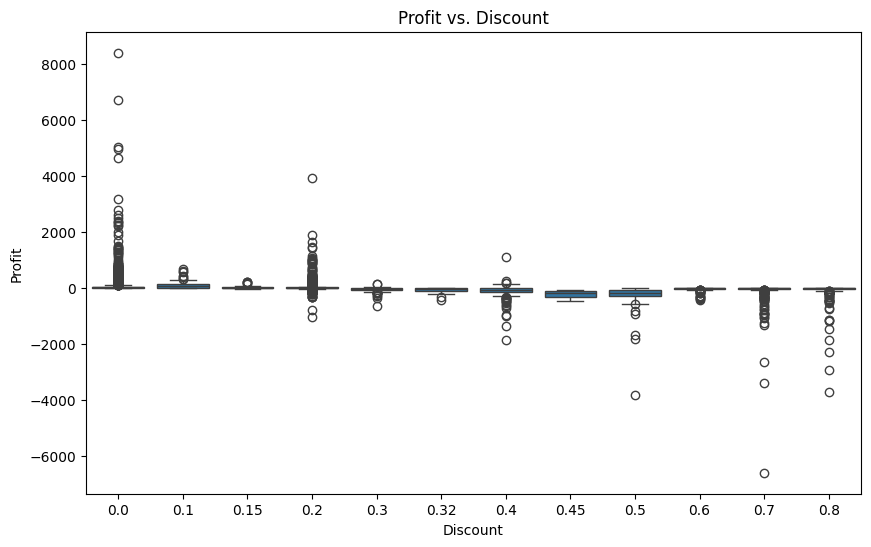

In [15]:
# Analyze the impact of discounts on profit
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount', y='Profit', data=df)
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_27508\1424506548.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_profit.index, y=segment_profit.values, palette='viridis')


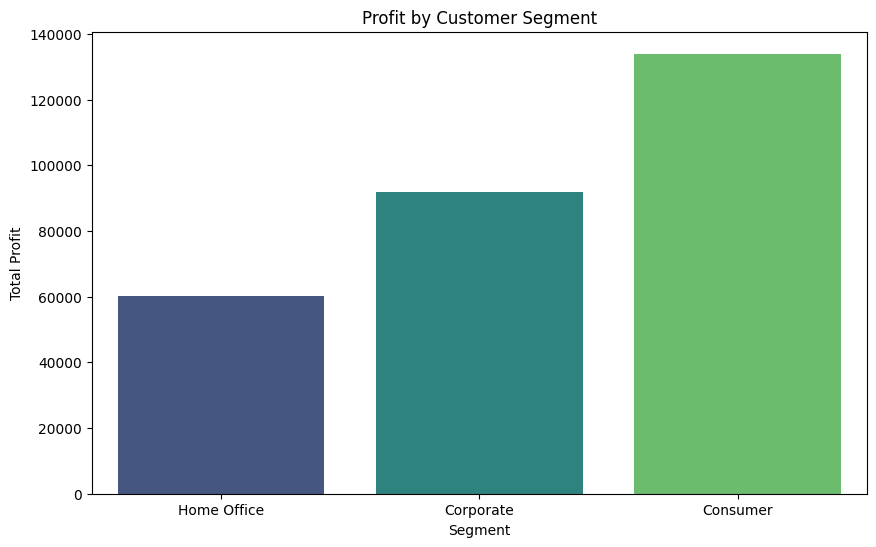

In [16]:
# Profit by Segment
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_profit.index, y=segment_profit.values, palette='viridis')
plt.title('Profit by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_27508\3449625009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipmode_profit.index, y=shipmode_profit.values, palette='viridis')


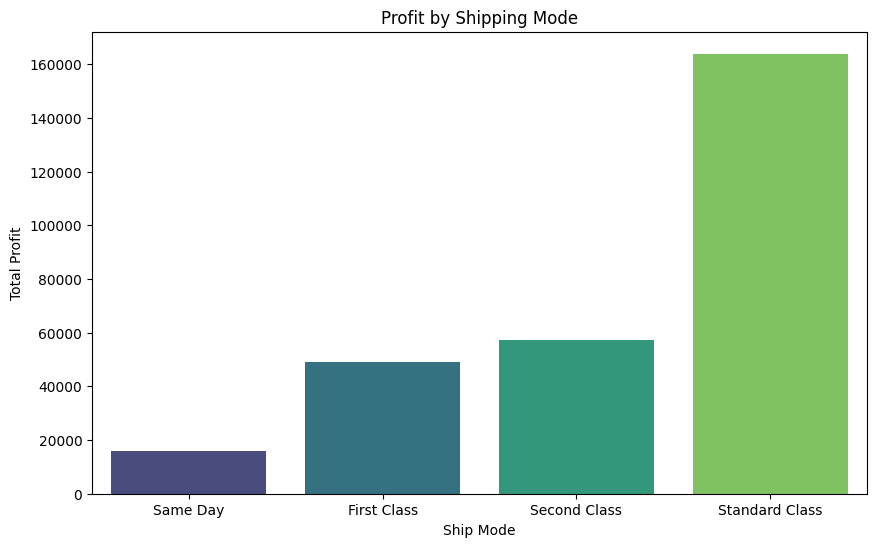

In [17]:
# Profit by Ship Mode
shipmode_profit = df.groupby('Ship Mode')['Profit'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=shipmode_profit.index, y=shipmode_profit.values, palette='viridis')
plt.title('Profit by Shipping Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.show()

### Key Business Problems Identified

#### Loss-Making Sub-Categories:

    Tables and Bookcases are the worst-performing sub-categories. Investigate production costs, pricing, or competition.

#### High Discounts, Low Profits:

     Identify categories or sub-categories where high discounts are leading to negative profits.

#### Underperforming Regions:

     Identify regions with consistently low profits.

#### Inefficient Shipping Modes:

    Same Day shipping may be costly. Analyze shipping cost vs. customer satisfaction.

In [18]:
import plotly.express as px

# Interactive Profit by Sub-Category
fig = px.bar(
    df.groupby('Sub-Category')['Profit'].sum().reset_index(),
    x='Sub-Category',
    y='Profit',
    title='Profit by Sub-Category',
    color='Profit',
    color_continuous_scale='Viridis'
)
fig.show()

2025-02-22 17:54:41.782 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 17:54:42.210 
  command:

    streamlit run c:\Users\Pc\anaconda3\envs\DEEP_LEARNING\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-22 17:54:42.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 17:54:42.211 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 17:54:42.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 17:54:42.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 17:54:42.214 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 17:54:42.215 Thread 

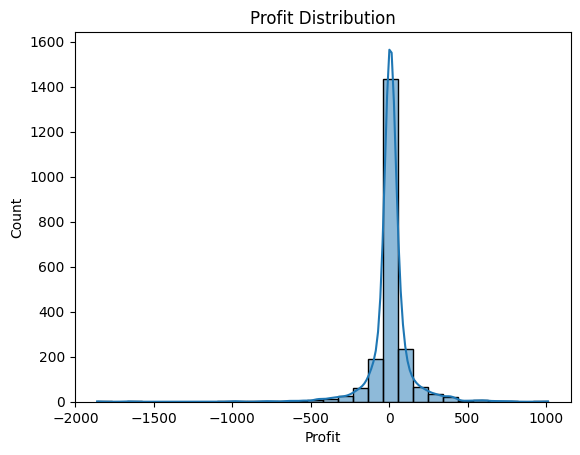

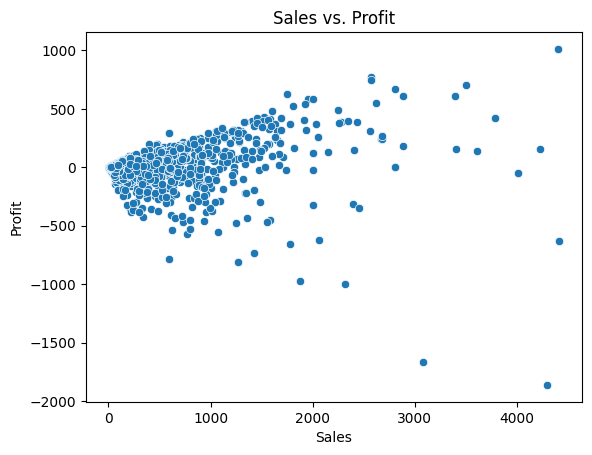

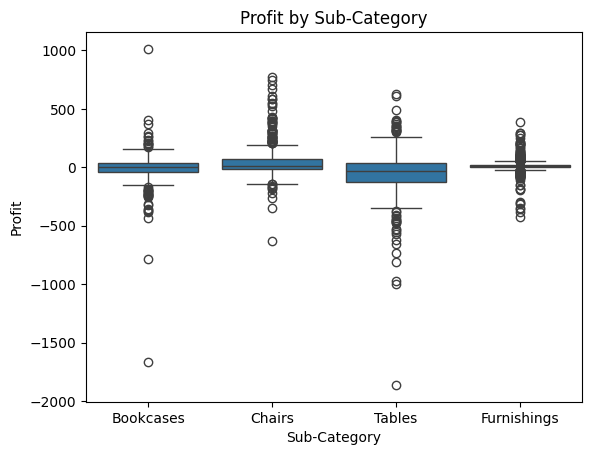

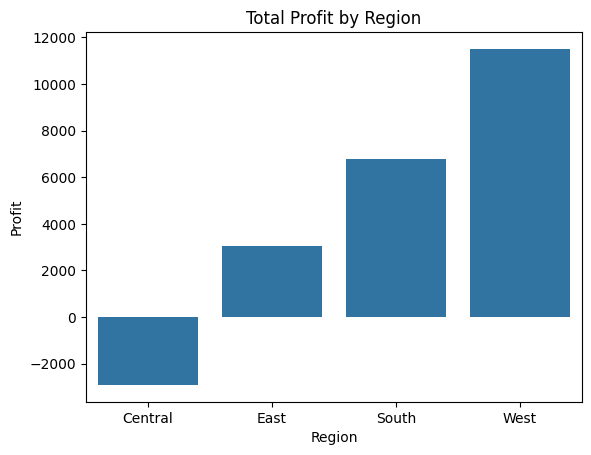

In [19]:
import streamlit as st

# Title of the dashboard
st.title('Sample Superstore Dashboard')

# Sidebar for user input
st.sidebar.header('User  Input Features')

# Select box for Category
category = st.sidebar.selectbox('Select Category', df['Category'].unique())

# Filter data based on user input
filtered_data = df[df['Category'] == category]

# Display the filtered data
st.subheader(f'Data for Category: {category}')
st.write(filtered_data)

# Profit Distribution
st.subheader('Profit Distribution')
fig, ax = plt.subplots()
sns.histplot(filtered_data['Profit'], bins=30, kde=True, ax=ax)
ax.set_title('Profit Distribution')
st.pyplot(fig)

# Sales vs. Profit
st.subheader('Sales vs. Profit')
fig, ax = plt.subplots()
sns.scatterplot(x='Sales', y='Profit', data=filtered_data, ax=ax)
ax.set_title('Sales vs. Profit')
st.pyplot(fig)

# Profit by Sub-Category
st.subheader('Profit by Sub-Category')
fig, ax = plt.subplots()
sns.boxplot(x='Sub-Category', y='Profit', data=filtered_data, ax=ax)
ax.set_title('Profit by Sub-Category')
st.pyplot(fig)

# Total Profit by Region
st.subheader('Total Profit by Region')
region_profit = filtered_data.groupby('Region')['Profit'].sum().reset_index()
fig, ax = plt.subplots()
sns.barplot(x='Region', y='Profit', data=region_profit, ax=ax)
ax.set_title('Total Profit by Region')
st.pyplot(fig)

# Conclusion
st.subheader('Conclusion')
st.write('This dashboard provides insights into the performance of different categories and sub-categories in terms of profit. '
         'You can explore how discounts affect profits and identify areas for improvement.')